In [1]:
import pandas as pd
import numpy as np
from cv_py import CrossValidation
from dataloading import DataLoader

In [2]:
%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


In [23]:
dl = DataLoader()
data = dl.import_agco_co(99)

In [14]:
items_per_user = dl.items_per_user(data)
user_per_item = dl.items_per_user(data.T)

In [13]:
items_per_user.item.describe()

count       284.000000
mean       7532.992958
std       12774.998241
min         178.000000
25%        2457.000000
50%        4442.500000
75%        8139.750000
max      172553.000000
Name: item, dtype: float64

In [22]:
np.sum(user_per_item.item > 1)

199414

<AxesSubplot:>

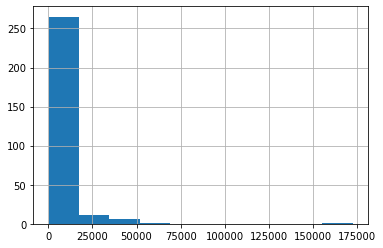

In [12]:
items_per_user.item.hist()

<AxesSubplot:>

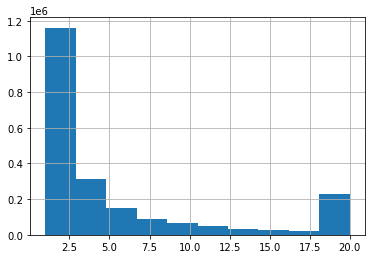

In [9]:
pd.Series(data.data).hist()

In [4]:
cv = CrossValidation(data, 5)

In [5]:
test, train = cv.split_k_fold()

In [24]:
alpha = (data.shape[0] * data.shape[1] - data.nnz) / sum(data.data)

In [25]:
alpha

3.4677779795097243

In [26]:
space = {'factors' : [20, 64, 128], 'regularization' : [0.001, 0.01, 0.1, 2], 'alpha' : [0.8, 5, 15, 30], 'iterations' : [15]}
hyper_test_als = cv.hyperp_tuning(test, train, space, 'iALS')


In [30]:
hyper_test_als[hyper_test_als.factors == 128]

,factors,regularization,alpha,iterations,precision,map,ndcg,auc,mpr
32,128,0.001,0.8,15,0.726901,0.623063,0.737471,0.505365,0.179686
33,128,0.001,5.0,15,0.581479,0.417509,0.564808,0.504202,0.126858
34,128,0.001,15.0,15,0.422535,0.258311,0.397948,0.503168,0.104832
35,128,0.001,30.0,15,0.294577,0.158700,0.274175,0.502338,0.088194
36,128,0.010,0.8,15,0.721901,0.615718,0.731373,0.505336,0.179082
37,128,0.010,5.0,15,0.587183,0.425076,0.569637,0.504183,0.125147
38,128,0.010,15.0,15,0.419225,0.253472,0.395888,0.503219,0.104442
39,128,0.010,30.0,15,0.298592,0.161578,0.279685,0.502363,0.087759
40,128,0.100,0.8,15,0.724930,0.616171,0.730845,0.505324,0.180643
41,128,0.100,5.0,15,0.591901,0.429423,0.576258,0.504229,0.125120
